# Instacart Business Insight Project

# Table of contents
## 1. Importing libraries and dataframe
## 2. Security and private data checks
## 3. Creating a regional segmentation
#### a. Creating the region segmentation
#### b. Creating the region column
#### c. Checking spending habits based on region
#### d. Checking ordering habits based on region
## 4. Excluding low_activity customers with an exclusion flag
#### a. Creating an exclusion falg
#### b. Excluding low_activity customer from the analysis
## 5. Creation of profiling variables
#### a. Age profiling
#### b. Income profiling
#### c. Dependents profiling
## 6. Creation of visualizations for each profiling type
#### a. Age profiling visualization
#### b. Income profiling visualization
#### c. Dependents profiling visualization
#### d. Family status profiling visualization
#### e. Region profiling visualization
#### f. Income profiling visualization based on family status
#### g. Age profiling visualization based on region
## 7. Aggregating data on customers' profiles
#### a. Aggregation on income category
#### b. Aggregation on family status category
#### c. Aggregation on region category
#### d. Aggregation on dependants category
## 8. Comparison customers' profiles with region and departments
#### a. Retrieving departments' denomination from previous dataset
#### b. Shares in the different departments
#### c. Departments shares by age-group
#### d. Departments shares by income category
#### e. Departments shares by family status
#### f. Departments shares by region
#### g. Departments shares by dependents
## 9. Creation of other charts
#### a. Family status per region
#### b. Income category per region
#### c. Share of dependents per region
## 10. Exporting the dataset

## 1. Importing libraries and dataframe 

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Importing path and dataframe

path = r'C:\Users\salmi\Desktop\Projects\Achievement 4\Instacart Basket Analysis'

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_all_merged_2.pkl'))

## 2. Security and private data checks

In [7]:
# Code to visualize all the columns
pd.set_option('display.max_columns', None)

In [8]:
ords_prods_cust.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both


The dataframe does not have any personally identifiable information (PII). All columns related to first name and surname have been removed.

In [10]:
# Data conssistency checks
ords_prods_cust.shape

(32404859, 30)

In [11]:
ords_prods_cust.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
order_id                    object
order_amount                 int64
orders_day_of_week          object
order_hour_of_day            int64
days_since_prior_order     float64
product_id                  object
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                    object
department_id               object
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spender_flag                object
customer frequency         float64
frequency flag      

## 3. Creating a regional segmentation 

#### a. Creating the region segmentation

In [14]:
# Checking the states
unique_states = ords_prods_cust['state'].unique()

In [15]:
unique_states

array(['Missouri', 'New Mexico', 'Idaho', 'Iowa', 'Maryland', 'Kentucky',
       'Montana', 'South Carolina', 'Texas', 'Virginia', 'Nevada',
       'Nebraska', 'Georgia', 'Wyoming', 'Colorado', 'North Dakota',
       'Wisconsin', 'Alaska', 'Vermont', 'Arkansas', 'Maine',
       'North Carolina', 'West Virginia', 'Indiana', 'Oregon', 'Florida',
       'California', 'Pennsylvania', 'Ohio', 'Connecticut', 'Arizona',
       'Louisiana', 'Washington', 'New York', 'Mississippi', 'Oklahoma',
       'Utah', 'New Hampshire', 'Hawaii', 'District of Columbia',
       'Alabama', 'Massachusetts', 'Rhode Island', 'Michigan',
       'New Jersey', 'Kansas', 'South Dakota', 'Minnesota', 'Illinois',
       'Tennessee', 'Delaware'], dtype=object)

In [16]:
len(unique_states)

51

In [17]:
#Creating the region denomination with their respective states
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York','Pennsylvania','New Jersey']

In [18]:
midwest_region =['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [19]:
south_region =['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [20]:
west_region = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [21]:
#Checking the lenght of all the region 
len(northeast_region) + len (midwest_region) + len (south_region) +len (west_region)

51

#### b. Creating the region column  

In [23]:
# Creating the regional identification
ords_prods_cust.loc[ords_prods_cust['state'].isin(northeast_region), 'region'] = 'Northeast'

In [24]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(midwest_region), 'region'] = 'Midwest'

In [25]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(south_region), 'region'] = 'South'

In [26]:
ords_prods_cust.loc[ords_prods_cust['state'].isin(west_region), 'region'] = 'West'

In [27]:
#Checking data 

ords_prods_cust[['state', 'region']].head()

,state,region
0,Missouri,Midwest
1,Missouri,Midwest
2,Missouri,Midwest
3,Missouri,Midwest
4,Missouri,Midwest


In [28]:
ords_prods_cust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### c. Checking the spending habits based on the region 

In [30]:
spender_in_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'])
spender_in_region

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [31]:
# Checking with the results in percentage
spender_in_region_perct = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'], normalize = 'index')
spender_in_region_perct

spender_flag,High_spender,Low_spender
region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


With the results in percentage, we can actually see that all the regions have a higher proportion of low spender than high spender. 

#### d. Checking ordering habits based on the region 

In [34]:
# Finding the total order per region and its percentage

total_orders_per_region = ords_prods_cust.groupby('region').size().reset_index(name='total_orders')
total_orders_per_region['percentage'] = (total_orders_per_region['total_orders'] / total_orders_per_region['total_orders'].sum()) * 100
total_orders_per_region

,region,total_orders,percentage
0,Midwest,7597325,23.445018
1,Northeast,5722736,17.660117
2,South,10791885,33.303293
3,West,8292913,25.591573


(-1.0999997310746088,
 1.0999976335782493,
 -1.0999964140771168,
 1.099999730992464)

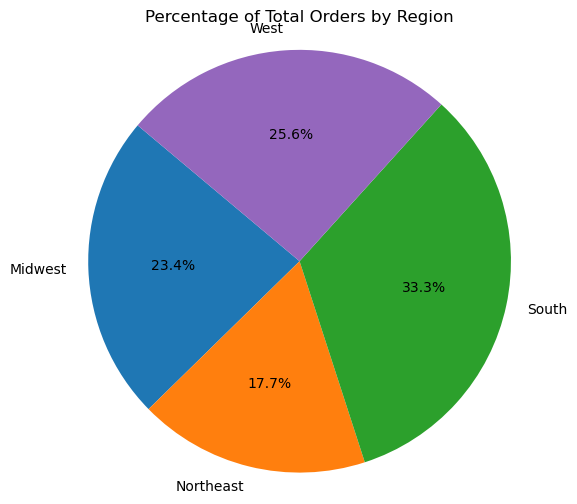

In [35]:
# Creating a pie chart tro visualize the oders per region
pie_orders_per_region = plt.figure(figsize=(6, 6))
pie_orders_per_region = plt.pie(total_orders_per_region['percentage'], labels=total_orders_per_region['region'], autopct='%1.1f%%', 
                                startangle=140,
                              colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])
pie_orders_per_region = plt.title('Percentage of Total Orders by Region')
pie_orders_per_region = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_per_region_visu.png'), bbox_inches = 'tight')
pie_orders_per_region

## 4. Excluding low-activity customers with exclusion flag

#### a. Creating exclusion flag 

In [38]:
# Excluding customers with a max_order lower than 5
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [39]:
# Customers whit a max_order greater than or equal to 5
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Stay'

In [40]:
# Checking the frequence
ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Stay       30964564
Exclude     1440295
Name: count, dtype: int64

In [41]:
ords_prods_cust[['exclusion_flag', 'max_order']].head()

,exclusion_flag,max_order
0,Stay,8
1,Stay,8
2,Stay,8
3,Stay,8
4,Stay,8


In [42]:
# Creating the exlusion_flag crosstab
exclusion_flag_crosstab = pd.crosstab(ords_prods_cust['exclusion_flag'], ords_prods_cust['max_order'], dropna = False)

In [43]:
# The excel doc will be available in the folder Reports
exclusion_flag_crosstab.to_clipboard()

#### b. Excluding low-activity customer from the analysis 

In [45]:
# Creating a sample with only high activity customer
ords_prods_cust_active = ords_prods_cust[ords_prods_cust['exclusion_flag'] == 'Stay']

In [46]:
# Checking sample size 
ords_prods_cust_active.shape

(30964564, 32)

The analysis will then focus on customers that are the most active

## 5. Creation of profiling variable
#### a. Age profiling

In [49]:
ords_prods_cust_active['age'].max()

81

In [50]:
ords_prods_cust_active['age'].min()

18

In order to ease the profiling task, categories will be created based on the age of users:

Young Adult: 18 to 25 years old

Adult: 26 to 45 years old

Middle Aged: 46 to 65 years old

Senior: 66 years old and above

In [52]:
# Assigning the age groups

ords_prods_cust_active.loc[(ords_prods_cust_active['age'] >= 18) & (ords_prods_cust_active['age'] <= 25), 'age_group'] = 'Young Adult'
ords_prods_cust_active.loc[(ords_prods_cust_active['age'] >= 26) & (ords_prods_cust_active['age'] <= 45), 'age_group'] = 'Adult'
ords_prods_cust_active.loc[(ords_prods_cust_active['age'] >= 46) & (ords_prods_cust_active['age'] <= 65), 'age_group'] = 'Middle Aged'
ords_prods_cust_active.loc[ords_prods_cust_active['age'] >= 66, 'age_group'] = 'Senior'

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3117319872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active.loc[(ords_prods_cust_active['age'] >= 18) & (ords_prods_cust_active['age'] <= 25), 'age_group'] = 'Young Adult'


In [53]:
# Checking the new created flag
ords_prods_cust_active[['age', 'age_group']].head()

,age,age_group
0,48,Middle Aged
1,48,Middle Aged
2,48,Middle Aged
3,48,Middle Aged
4,48,Middle Aged


In [54]:
ords_prods_cust_active['age_group'].value_counts(dropna = False)

age_group
Adult          9702539
Middle Aged    9666673
Senior         7730834
Young Adult    3864518
Name: count, dtype: int64

#### b. Income profiling

In [56]:
ords_prods_cust_active['income'].max()

593901

In [57]:
ords_prods_cust_active['income'].min()

25903

In order to ease the profiling task, categories will be created based on the income (in $) of users:

Low Income: 25,000 to 100,000 

Mid Income: 100,001 to 100,000

High Income: 300,001 to 600,000

In [59]:
# Assigning the income group

ords_prods_cust_active.loc[(ords_prods_cust_active['income'] >= 25000) & (ords_prods_cust_active['income'] <= 100000), 'income_cat'] = 'Low income'
ords_prods_cust_active.loc[(ords_prods_cust_active['income'] > 100000) & (ords_prods_cust_active['income'] <= 300000), 'income_cat'] = 'Mid income'
ords_prods_cust_active.loc[(ords_prods_cust_active['income'] > 300000) & (ords_prods_cust_active['income'] <= 600000), 'income_cat'] = 'High income'

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\2685028320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active.loc[(ords_prods_cust_active['income'] >= 25000) & (ords_prods_cust_active['income'] <= 100000), 'income_cat'] = 'Low income'


In [60]:
# Checking the new created flag
ords_prods_cust_active[['income', 'income_cat']].head()

,income,income_cat
0,165665,Mid income
1,165665,Mid income
2,165665,Mid income
3,165665,Mid income
4,165665,Mid income


In [61]:
ords_prods_cust_active['income_cat'].value_counts(dropna = False)

income_cat
Low income     16757536
Mid income     14106999
High income      100029
Name: count, dtype: int64

#### c. Dependents profiling 

For this section, we will assign 2 groups:

No dependants

With dependants

In [64]:
ords_prods_cust_active.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag,_merge,region,exclusion_flag,age_group,income_cat
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income


In [65]:
# Creating the flag for the number of dependants
ords_prods_cust_active.loc[ords_prods_cust_active['n_dependants'] > 0, 'dependant_flag'] = 'With dependants'
ords_prods_cust_active.loc[ords_prods_cust_active['n_dependants'] == 0, 'dependant_flag'] = 'No dependant'

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\264831327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active.loc[ords_prods_cust_active['n_dependants'] > 0, 'dependant_flag'] = 'With dependants'


In [66]:
ords_prods_cust_active[['n_dependants', 'dependant_flag']].head()

,n_dependants,dependant_flag
0,3,With dependants
1,3,With dependants
2,3,With dependants
3,3,With dependants
4,3,With dependants


In [67]:
ords_prods_cust_active['dependant_flag'].value_counts(dropna = False)

dependant_flag
With dependants    23224883
No dependant        7739681
Name: count, dtype: int64

## 6. Creation of visualization for each profiling type

#### Creation of visualization with required columns

In [70]:
sample_pop = ords_prods_cust_active[['user_id', 'frequency flag', 'spender_flag', 'age_group', 
                                     'income_cat', 'dependant_flag', 'region', 'loyalty_flag', 'fam_status']]

In [71]:
ords_prods_cust_active.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag,_merge,region,exclusion_flag,age_group,income_cat,dependant_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants


In [72]:
# Ensuring there is a unique user_id appearing to avoid duplicates based on orders
sample_pop =sample_pop.drop_duplicates()

In [73]:
sample_pop

,user_id,frequency flag,spender_flag,age_group,income_cat,dependant_flag,region,loyalty_flag,fam_status
0,26711,Regular-frequent customer,Low_spender,Middle Aged,Mid income,With dependants,Midwest,New customer,married
18,33890,Non-frequent customer,Low_spender,Adult,Low income,No dependant,West,Regular customer,single
91,65803,Frequent customer,Low_spender,Adult,Low income,With dependants,West,New customer,married
195,125935,Regular-frequent customer,Low_spender,Adult,Low income,No dependant,Midwest,Regular customer,single
351,130797,Frequent customer,Low_spender,Adult,Low income,With dependants,South,Regular customer,married
...,...,...,...,...,...,...,...,...,...
32404577,179673,Frequent customer,Low_spender,Senior,Mid income,No dependant,West,New customer,divorced/widowed
32404593,75529,Non-frequent customer,Low_spender,Young Adult,Low income,With dependants,South,New customer,married
32404629,157533,Frequent customer,Low_spender,Middle Aged,Low income,No dependant,West,New customer,single
32404665,122741,Non-frequent customer,Low_spender,Young Adult,Low income,With dependants,Midwest,New customer,married


#### a. Age profiling visualization

In [75]:
# Creation of a pie chart for the age_group distribution

age_group_count = sample_pop['age_group'].value_counts(normalize=True) * 100

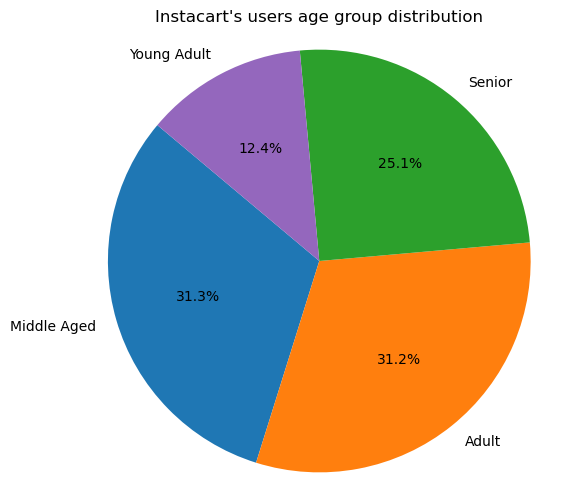

In [76]:
plt.figure(figsize=(6, 6))
plt.pie(age_group_count, labels=age_group_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])  # Color blind friendly
plt.title("Instacart's users age group distribution")  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_age_group_visu.png'), bbox_inches = 'tight')
plt.show()

#### b. Income profiling visualization

In [78]:
# Creation of a pie chart for the income_cat distribution

income_cat_count = sample_pop['income_cat'].value_counts(normalize=True) * 100

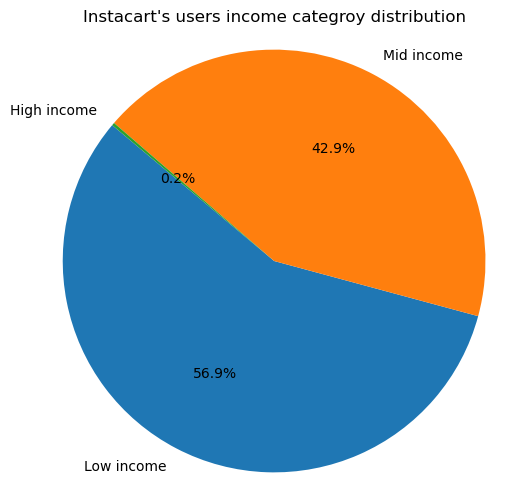

In [79]:
plt.figure(figsize=(6, 6))
plt.pie(income_cat_count, labels=income_cat_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])  # Color blind friendly
plt.title("Instacart's users income categroy distribution")  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_income_cat_visu.png'), bbox_inches = 'tight')
plt.show()

In [80]:
sample_pop['income_cat'].value_counts()

income_cat
Low income     92551
Mid income     69735
High income      345
Name: count, dtype: int64

#### c. Dependants profiling visualization

In [82]:
# Creation of a pie chart for the dependant_flag distribution

dependant_count = sample_pop['dependant_flag'].value_counts(normalize=True) * 100

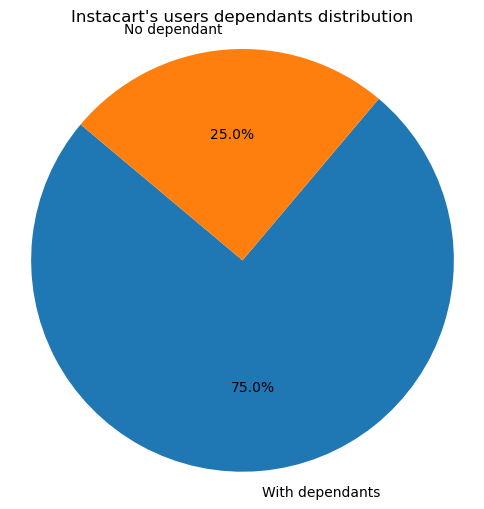

In [83]:
plt.figure(figsize=(6, 6))
plt.pie(dependant_count, labels=dependant_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])  # Color blind friendly
plt.title("Instacart's users dependants distribution")  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_dependant_flag_visu.png'), bbox_inches = 'tight')
plt.show()

#### d. Family status profiling distribution 

In [85]:
# Creation of a pie chart for the family status distribution

family_status = sample_pop['fam_status'].value_counts(normalize=True) * 100

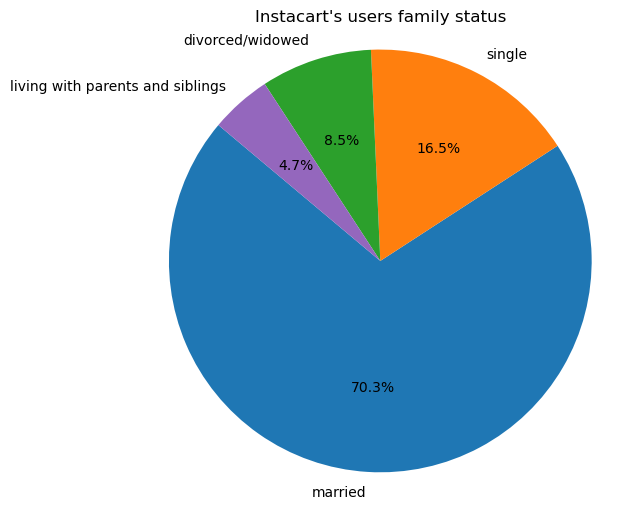

In [86]:
plt.figure(figsize=(6, 6))
plt.pie(family_status, labels=family_status.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])  # Color blind friendly
plt.title("Instacart's users family status")  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_family_status_visu.png'), bbox_inches = 'tight')
plt.show()

#### d. Region profiling 

In [88]:
# Creation of a pie chart for the region distribution of users

users_region = sample_pop['region'].value_counts(normalize=True) * 100

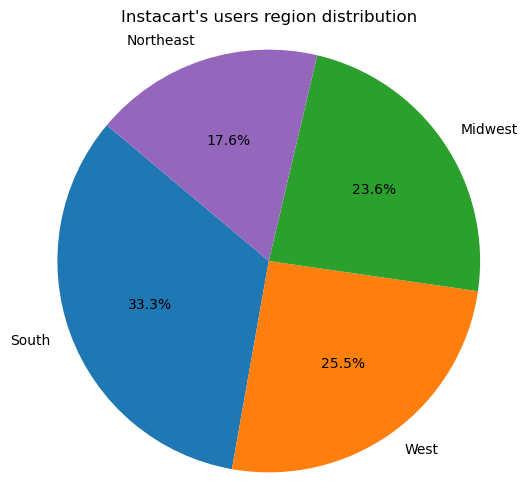

In [89]:
plt.figure(figsize=(6, 6))
plt.pie(users_region, labels=users_region.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B'])  # Color blind friendly
plt.title("Instacart's users region distribution")  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'users_region_visu.png'), bbox_inches = 'tight')
plt.show()

#### e. Income profiling based on family status

In [91]:
# Creation of a chart showing income category based on the family status

income_fam_percent = pd.crosstab(sample_pop['income_cat'], sample_pop['fam_status'], normalize='index') * 100

In [92]:
# Colorblind-friendly colors
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B']

<Figure size 1400x1200 with 0 Axes>

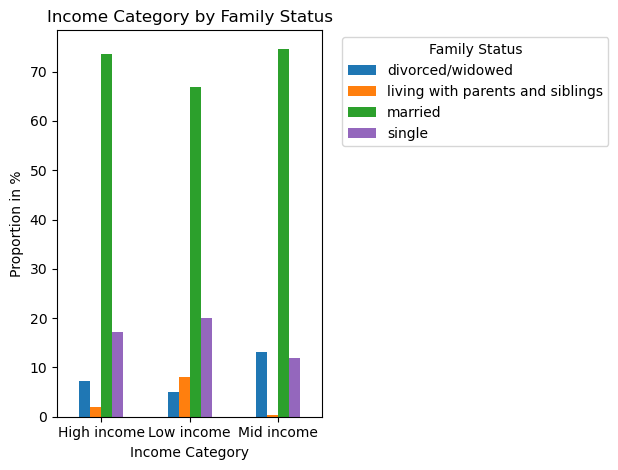

In [93]:
plt.figure(figsize=(14, 12))
income_fam_percent.plot(kind='bar', color=colors)
plt.title('Income Category by Family Status')
plt.xlabel('Income Category')
plt.ylabel('Proportion in %')
plt.xticks(rotation=0)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_stat_per_income_cat.png'), bbox_inches = 'tight')
plt.show()

#### f. Age profiling based on the region

In [95]:
# Creation of a chart showing age category based on the region

age_region_percent = pd.crosstab(sample_pop['region'], sample_pop['age_group'], normalize='index') * 100

<Figure size 1400x1200 with 0 Axes>

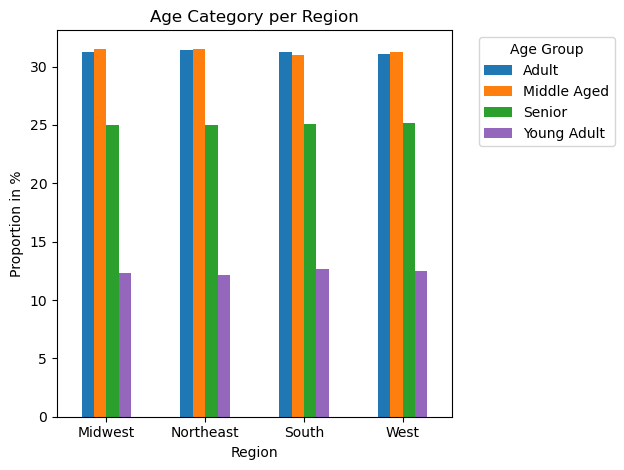

In [96]:
plt.figure(figsize=(14, 12))
age_region_percent.plot(kind='bar', color=colors)
plt.title('Age Category per Region')
plt.xlabel('Region')
plt.ylabel('Proportion in %')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_per_region.png'), bbox_inches = 'tight')
plt.show()

## 7. Aggregating data on customer-profile 

#### a. Aggregation on Age-group Category

Here, we will be using again the whole dataframe named: ords_prods_cust_active

In [100]:
# Creating a subset of the dataframe with the necessary columns and having the total prices for all orders
subset_for_agg = ords_prods_cust_active.groupby(
    ['user_id', 'age_group', 'income_cat', 'dependant_flag', 'loyalty_flag', 'region', 
     'fam_status', 'order_amount', 'days_since_prior_order',
     'orders_day_of_week', 'order_hour_of_day']
)['prices'].sum().reset_index()

In [101]:
subset_for_agg.head() #Checking the creation of the subset

,user_id,age_group,income_cat,dependant_flag,loyalty_flag,region,fam_status,order_amount,days_since_prior_order,orders_day_of_week,order_hour_of_day,prices
0,1,Adult,Low income,With dependants,New customer,South,married,2,15.0,3,7,35.4
1,1,Adult,Low income,With dependants,New customer,South,married,3,21.0,3,12,28.2
2,1,Adult,Low income,With dependants,New customer,South,married,4,29.0,4,7,26.0
3,1,Adult,Low income,With dependants,New customer,South,married,5,28.0,4,15,57.0
4,1,Adult,Low income,With dependants,New customer,South,married,6,19.0,2,7,25.0


In [102]:
#Renaming prices to total_prices for clarity
subset_for_agg.rename(columns={'prices': 'total_prices'}, inplace=True)

In [103]:
# Aggregations by age group
aggregations_by_age_group = subset_for_agg.groupby('age_group').agg({
    'days_since_prior_order': ['min', 'mean', 'max'],
    'total_prices': ['min', 'mean', 'max']})
aggregations_by_age_group

days_since_prior_order                  total_prices             \
                               min       mean   max          min       mean   
age_group                                                                     
Adult                          0.0  10.400522  30.0          0.0  78.902503   
Middle Aged                    0.0  10.387180  30.0          0.0  78.632479   
Senior                         0.0  10.367963  30.0          0.0  78.314128   
Young Adult                    0.0  10.380577  30.0          0.0  78.871569   

                     
                max  
age_group            
Adult         829.2  
Middle Aged  1092.2  
Senior        751.1  
Young Adult   842.1

Since we are analyzing active users, most age groups have their maximum days since prior orders set to 30 days. When examining total prices based on the number of orders, middle-aged individuals place the most orders, while seniors place fewer. However, on average, each age group spends the same amount.

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3556221687.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], aggregations_by_age_group_sorted[('total_prices', 'min')][i] + 20,
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3556221687.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(int(aggregations_by_age_group_sorted[('total_prices', 'min')][i])),
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3556221687.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

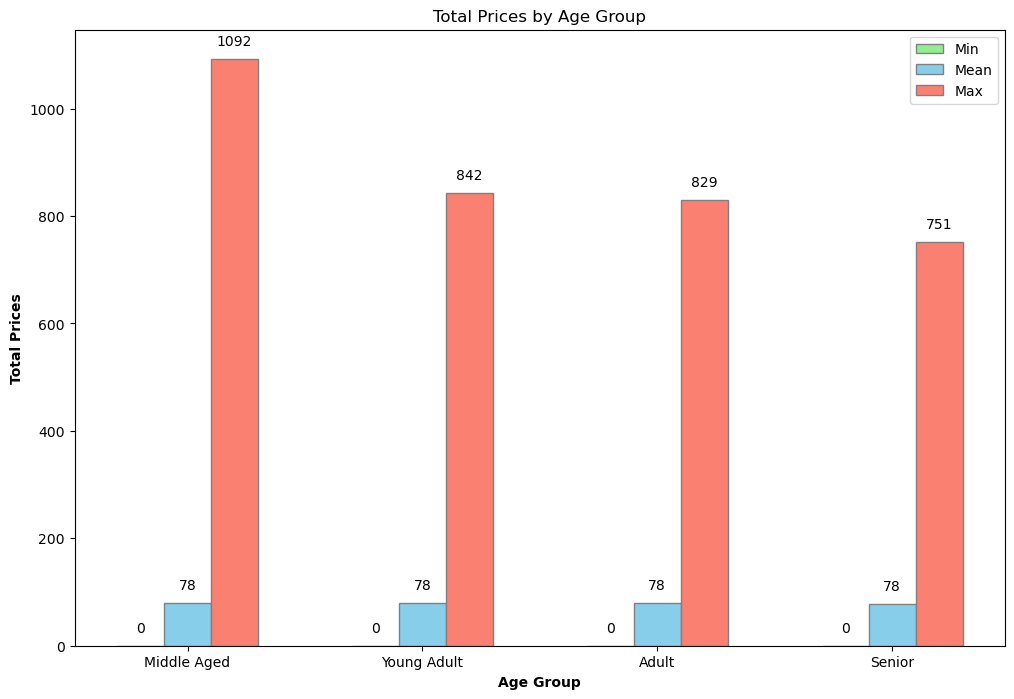

In [297]:
# Sort the DataFrame based on the 'max' value
aggregations_by_age_group_sorted = aggregations_by_age_group.sort_values(('total_prices', 'max'), ascending=False)

# Setting the width of bars
bar_width = 0.2

# Setting positions of the bars on the X-axis
r1 = np.arange(len(aggregations_by_age_group_sorted))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot for total prices with Min, Mean, and Max
plt.figure(figsize=(12, 8))

plt.bar(r1, aggregations_by_age_group_sorted[('total_prices', 'min')], color='lightgreen', width=bar_width, edgecolor='grey', label='Min')
plt.bar(r2, aggregations_by_age_group_sorted[('total_prices', 'mean')], color='skyblue', width=bar_width, edgecolor='grey', label='Mean')
plt.bar(r3, aggregations_by_age_group_sorted[('total_prices', 'max')], color='salmon', width=bar_width, edgecolor='grey', label='Max')

# Adding titles and labels
plt.title('Total Prices by Age Group')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Total Prices', fontweight='bold')

# Adding the legend
plt.legend()

# Adding the xticks
plt.xticks([r + bar_width for r in range(len(aggregations_by_age_group_sorted))], aggregations_by_age_group_sorted.index)

# Annotating the bars with integer values for 'min'
for i in range(len(aggregations_by_age_group_sorted)):
    plt.text(r1[i], aggregations_by_age_group_sorted[('total_prices', 'min')][i] + 20, 
             str(int(aggregations_by_age_group_sorted[('total_prices', 'min')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'mean'
for i in range(len(aggregations_by_age_group_sorted)):
    plt.text(r2[i], aggregations_by_age_group_sorted[('total_prices', 'mean')][i] + 20, 
             str(int(aggregations_by_age_group_sorted[('total_prices', 'mean')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'max'
for i in range(len(aggregations_by_age_group_sorted)):
    plt.text(r3[i], aggregations_by_age_group_sorted[('total_prices', 'max')][i] + 20, 
             str(int(aggregations_by_age_group_sorted[('total_prices', 'max')][i])), 
             ha='center', va='bottom')
# Sving the figure    
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'descriptive analysis max min age group.png'), bbox_inches = 'tight')
plt.show()

#### b. Aggregation on Income Category

In [106]:
# Aggregations by income
aggregations_by_income = subset_for_agg.groupby('income_cat').agg({
    'days_since_prior_order': ['min', 'mean', 'max'],
    'total_prices': ['min', 'mean', 'max']})
aggregations_by_income

days_since_prior_order                  total_prices             \
                               min       mean   max          min       mean   
income_cat                                                                    
High income                    0.0   9.133486  30.0          0.0  88.744044   
Low income                     0.0  10.483710  30.0          0.0  74.667421   
Mid income                     0.0  10.268348  30.0          0.0  83.723472   

                     
                max  
income_cat           
High income   621.2  
Low income    875.0  
Mid income   1092.2

When examining the frequency and expenditure based on income category groups, high-income earners on average place fewer orders and incur lower total expenses compared to other groups. This can be attributed to the fact that users in the high-income category constitute the smallest group (0.2% of Instacart's users).

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3812374635.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], aggregations_by_income_sorted[('total_prices', 'min')][i] + 20,
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3812374635.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(int(aggregations_by_income_sorted[('total_prices', 'min')][i])),
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3812374635.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

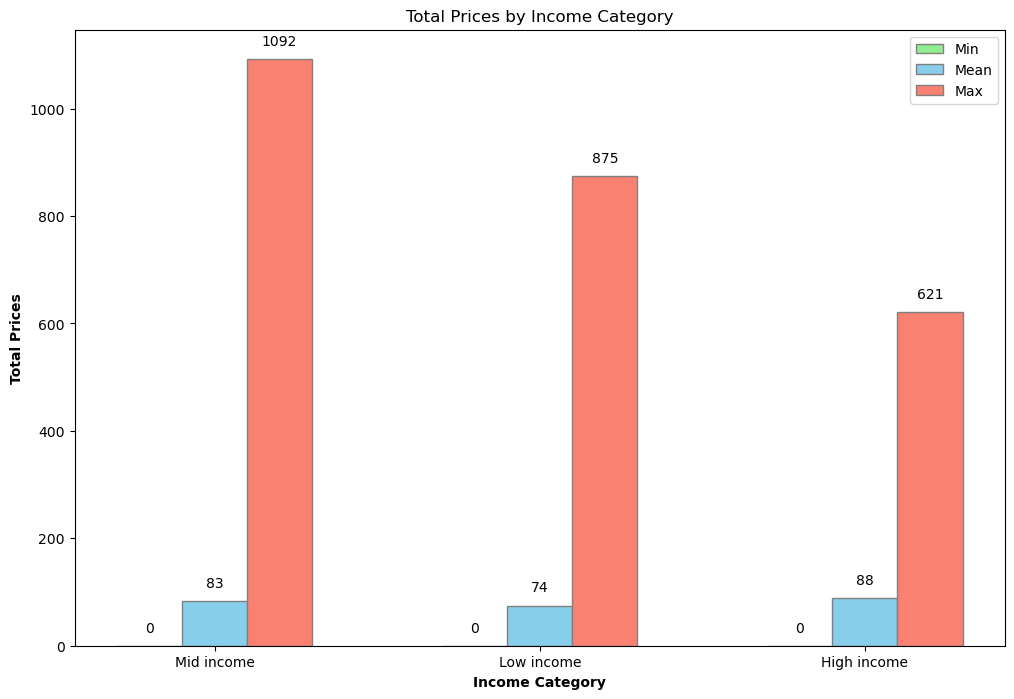

In [295]:
# Sort the DataFrame based on the 'max' value
aggregations_by_income_sorted = aggregations_by_income.sort_values(('total_prices', 'max'), ascending=False)

# Setting the width of bars
bar_width = 0.2

# Setting positions of the bars on the X-axis
r1 = np.arange(len(aggregations_by_income))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot for total prices with Min, Mean, and Max
plt.figure(figsize=(12, 8))

plt.bar(r1, aggregations_by_income_sorted[('total_prices', 'min')], color='lightgreen', width=bar_width, edgecolor='grey', label='Min')
plt.bar(r2, aggregations_by_income_sorted[('total_prices', 'mean')], color='skyblue', width=bar_width, edgecolor='grey', label='Mean')
plt.bar(r3, aggregations_by_income_sorted[('total_prices', 'max')], color='salmon', width=bar_width, edgecolor='grey', label='Max')

# Adding titles and labels
plt.title('Total Prices by Income Category')
plt.xlabel('Income Category', fontweight='bold')
plt.ylabel('Total Prices', fontweight='bold')

# Adding the legend
plt.legend()

# Adding the xticks
plt.xticks([r + bar_width for r in range(len(aggregations_by_income_sorted))], aggregations_by_income_sorted.index)

# Annotating the bars with integer values for 'min'
for i in range(len(aggregations_by_income_sorted)):
    plt.text(r1[i], aggregations_by_income_sorted[('total_prices', 'min')][i] + 20, 
             str(int(aggregations_by_income_sorted[('total_prices', 'min')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'mean'
for i in range(len(aggregations_by_income_sorted)):
    plt.text(r2[i], aggregations_by_income_sorted[('total_prices', 'mean')][i] + 20, 
             str(int(aggregations_by_income_sorted[('total_prices', 'mean')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'max'
for i in range(len(aggregations_by_income_sorted)):
    plt.text(r3[i], aggregations_by_income_sorted[('total_prices', 'max')][i] + 20, 
             str(int(aggregations_by_income_sorted[('total_prices', 'max')][i])), 
             ha='center', va='bottom')
# Sving the figure    
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'descriptive analysis max min income cat.png'), bbox_inches = 'tight')
plt.show()

#### c. Aggregation on Dependants Category

In [109]:
# Aggregations by dependants
aggregations_by_dependants = subset_for_agg.groupby('dependant_flag').agg({
    'days_since_prior_order': ['min', 'mean', 'max'],
    'total_prices': ['min', 'mean', 'max']})
aggregations_by_dependants

days_since_prior_order                  total_prices  \
                                   min       mean   max          min   
dependant_flag                                                         
No dependant                       0.0  10.378169  30.0          0.0   
With dependants                    0.0  10.388225  30.0          0.0   

                                    
                      mean     max  
dependant_flag                      
No dependant     78.482107   875.0  
With dependants  78.728425  1092.2

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3784622398.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], aggregations_by_dependants_sorted[('total_prices', 'min')][i] + 20,
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3784622398.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(int(aggregations_by_dependants_sorted[('total_prices', 'min')][i])),
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3784622398.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

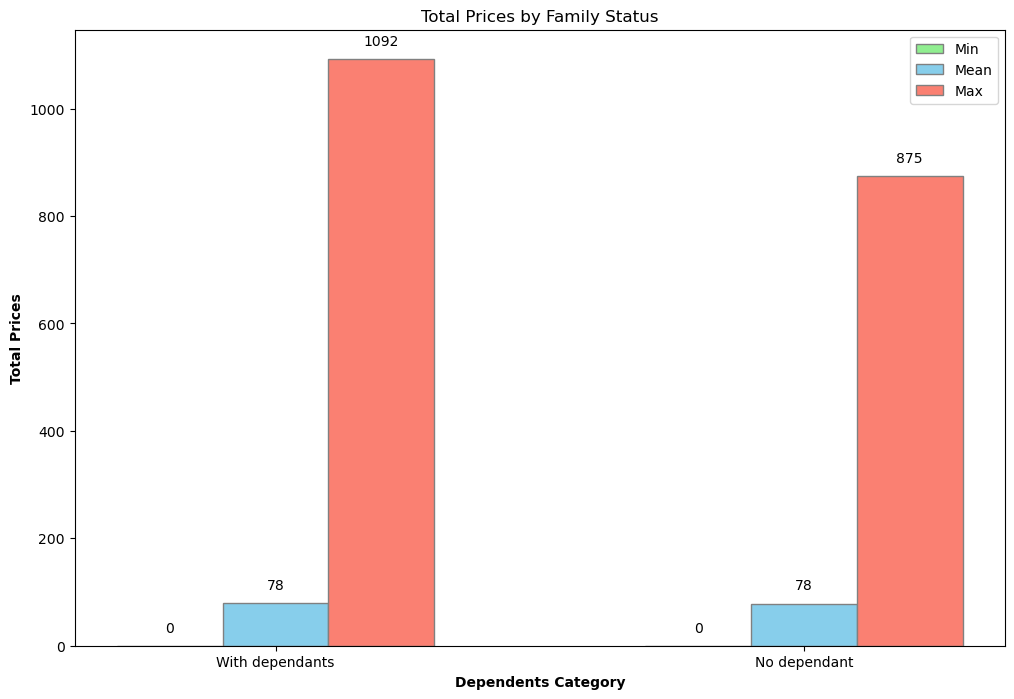

In [299]:
# Sort the DataFrame based on the 'max' value
aggregations_by_dependants_sorted = aggregations_by_dependants.sort_values(('total_prices', 'max'), ascending=False)

# Setting the width of bars
bar_width = 0.2

# Setting positions of the bars on the X-axis
r1 = np.arange(len(aggregations_by_dependants))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot for total prices with Min, Mean, and Max
plt.figure(figsize=(12, 8))

plt.bar(r1, aggregations_by_dependants_sorted[('total_prices', 'min')], color='lightgreen', width=bar_width, edgecolor='grey', label='Min')
plt.bar(r2, aggregations_by_dependants_sorted[('total_prices', 'mean')], color='skyblue', width=bar_width, edgecolor='grey', label='Mean')
plt.bar(r3, aggregations_by_dependants_sorted[('total_prices', 'max')], color='salmon', width=bar_width, edgecolor='grey', label='Max')

# Adding titles and labels
plt.title('Total Prices by Family Status')
plt.xlabel('Dependents Category', fontweight='bold')
plt.ylabel('Total Prices', fontweight='bold')

# Adding the legend
plt.legend()

# Adding the xticks
plt.xticks([r + bar_width for r in range(len(aggregations_by_dependants_sorted))], aggregations_by_dependants_sorted.index)

# Annotating the bars with integer values for 'min'
for i in range(len(aggregations_by_dependants_sorted)):
    plt.text(r1[i], aggregations_by_dependants_sorted[('total_prices', 'min')][i] + 20, 
             str(int(aggregations_by_dependants_sorted[('total_prices', 'min')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'mean'
for i in range(len(aggregations_by_dependants_sorted)):
    plt.text(r2[i], aggregations_by_dependants_sorted[('total_prices', 'mean')][i] + 20, 
             str(int(aggregations_by_dependants_sorted[('total_prices', 'mean')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'max'
for i in range(len(aggregations_by_dependants_sorted)):
    plt.text(r3[i], aggregations_by_dependants_sorted[('total_prices', 'max')][i] + 20, 
             str(int(aggregations_by_dependants_sorted[('total_prices', 'max')][i])), 
             ha='center', va='bottom')
    
# Sving the figure    
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'descriptive analysis max min dependent cat.png'), bbox_inches = 'tight')
plt.show()

Customers with dependents are the ones who place the most orders. This is likely due to the greater number of individuals in their households, which naturally requires more products.

#### d. Aggregation on Family Status

In [112]:
# Aggregations based on the family status
aggregations_fam_stats = subset_for_agg.groupby('fam_status').agg({
    'days_since_prior_order': ['min', 'mean', 'max'],
    'total_prices': ['min', 'mean', 'max']})
aggregations_fam_stats

days_since_prior_order                   \
                                                    min       mean   max   
fam_status                                                                 
divorced/widowed                                    0.0  10.352674  30.0   
living with parents and siblings                    0.0  10.301481  30.0   
married                                             0.0  10.394092  30.0   
single                                              0.0  10.391328  30.0   

                                 total_prices                     
                                          min       mean     max  
fam_status                                                        
divorced/widowed                          0.0  78.935329   875.0  
living with parents and siblings          1.0  79.416970   750.3  
married                                   0.0  78.681855  1092.2  
single                                    0.0  78.248188   712.0

Married customers are the ones with the highest number of orders and also account for the highest expenses.

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\1073158319.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], aggregations_fam_stats_sorted[('total_prices', 'min')][i] + 20,
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\1073158319.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(int(aggregations_fam_stats_sorted[('total_prices', 'min')][i])),
C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\1073158319.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

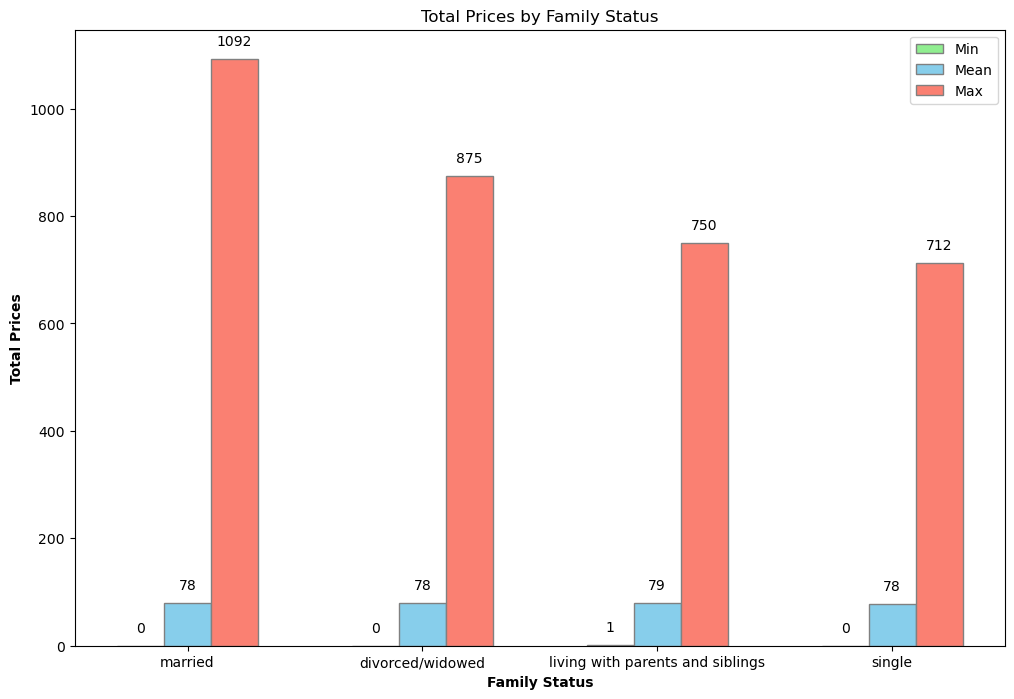

In [293]:
# Sort the DataFrame based on the 'max' value
aggregations_fam_stats_sorted = aggregations_fam_stats.sort_values(('total_prices', 'max'), ascending=False)

# Setting the width of bars
bar_width = 0.2

# Setting positions of the bars on the X-axis
r1 = np.arange(len(aggregations_fam_stats))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot for total prices with Min, Mean, and Max
plt.figure(figsize=(12, 8))

plt.bar(r1, aggregations_fam_stats_sorted[('total_prices', 'min')], color='lightgreen', width=bar_width, edgecolor='grey', label='Min')
plt.bar(r2, aggregations_fam_stats_sorted[('total_prices', 'mean')], color='skyblue', width=bar_width, edgecolor='grey', label='Mean')
plt.bar(r3, aggregations_fam_stats_sorted[('total_prices', 'max')], color='salmon', width=bar_width, edgecolor='grey', label='Max')

# Adding titles and labels
plt.title('Total Prices by Family Status')
plt.xlabel('Family Status', fontweight='bold')
plt.ylabel('Total Prices', fontweight='bold')

# Adding the legend
plt.legend()

# Adding the xticks
plt.xticks([r + bar_width for r in range(len(aggregations_fam_stats_sorted))], aggregations_fam_stats_sorted.index)

# Annotating the bars with integer values for 'min'
for i in range(len(aggregations_fam_stats_sorted)):
    plt.text(r1[i], aggregations_fam_stats_sorted[('total_prices', 'min')][i] + 20, 
             str(int(aggregations_fam_stats_sorted[('total_prices', 'min')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'mean'
for i in range(len(aggregations_fam_stats_sorted)):
    plt.text(r2[i], aggregations_fam_stats_sorted[('total_prices', 'mean')][i] + 20, 
             str(int(aggregations_fam_stats_sorted[('total_prices', 'mean')][i])), 
             ha='center', va='bottom')

# Annotating the bars with integer values for 'max'
for i in range(len(aggregations_fam_stats_sorted)):
    plt.text(r3[i], aggregations_fam_stats_sorted[('total_prices', 'max')][i] + 20, 
             str(int(aggregations_fam_stats_sorted[('total_prices', 'max')][i])), 
             ha='center', va='bottom')
    
# Sving the figure    
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'descriptive analysis max min fam status.png'), bbox_inches = 'tight')
plt.show()

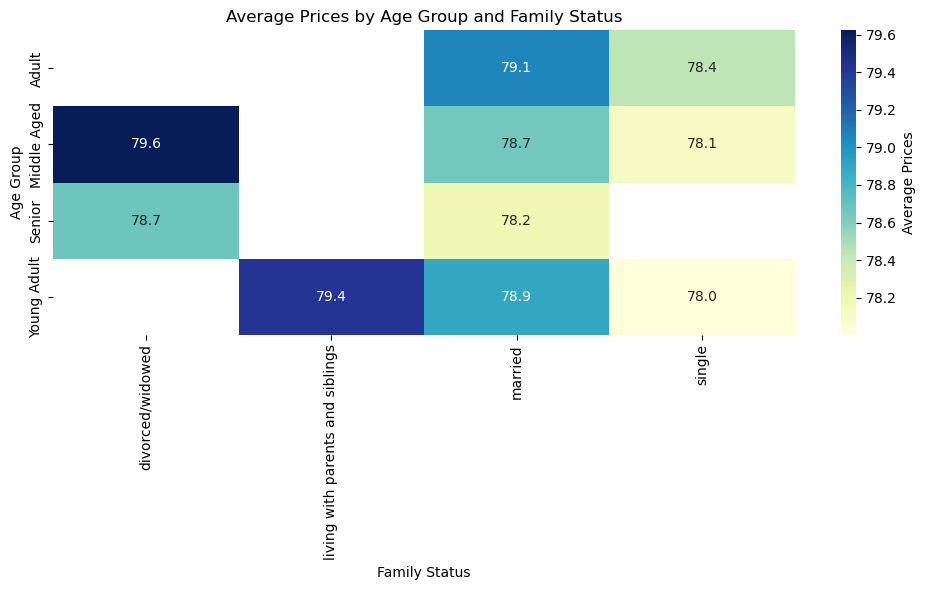

In [114]:
#Creation of a heatmap to see correlation in spending habits between the different age group and family status
heatmap_data = subset_for_agg.pivot_table(values='total_prices', index='age_group', columns='fam_status', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Average Prices'})
plt.title('Average Prices by Age Group and Family Status')
plt.xlabel('Family Status')
plt.ylabel('Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heat_map_famstat_age'), bbox_inches = 'tight')
plt.show()

On average, divorced/widowed middle age users are the ones buying more, followed young adult living with parents and siblings and married adult.

## 8. Comparison customer profiles with regions and department

To perform this task I mapped the results of a dataset on which we work in a previous task.

#### a. Retrieving departments' denomination from a previous dataset

In [119]:
#Creating department mapping
department_mapping = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [120]:
department_df = ords_prods_cust_active.from_dict(department_mapping, orient='index').reset_index()
department_df.rename(columns={'index': 'department_id'}, inplace=True)

In [121]:
# Merge department names into ords_prods_cust_active DataFrame
ords_prods_cust_active['department_id'] = ords_prods_cust_active['department_id'].astype(str)  # Ensure department_id is string type
ords_prods_cust_active = pd.merge(ords_prods_cust_active, department_df, on='department_id')

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3021971450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active['department_id'] = ords_prods_cust_active['department_id'].astype(str)  # Ensure department_id is string type


In [122]:
ords_prods_cust_active

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag,_merge,region,exclusion_flag,age_group,income_cat,dependant_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants,produce
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants,dairy eggs
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants,dairy eggs
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,29372,8,1,Prilosec Heart Burn Relief 20 Mg Tablets,70,11,5.1,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants,personal care
30964560,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,18539,9,0,Moist Supreme Classic Yellow Cake Mix,105,13,9.7,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants,pantry
30964561,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,47115,10,0,Favorites Super Moist Butter Recipe Yellow Cak...,105,13,8.6,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants,pantry
30964562,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,32964,11,0,Rich and Creamy Milk Chocolate Frosting,97,13,12.2,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants,pantry


In [123]:
# Checking the frequency of merged values
ords_prods_cust_active['_merge'].value_counts(dropna = False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [124]:
# Rename 'department' column to 'department_name'
ords_prods_cust_active.rename(columns={'department': 'department_name'}, inplace=True)

In [125]:
# Reorder columns: move 'department_name' next to 'department_id'
cols = list(ords_prods_cust_active.columns)
cols.remove('department_name')
cols.insert(cols.index('department_id') + 1, 'department_name')
ords_prods_cust_active = ords_prods_cust_active[cols]

In [126]:
ords_prods_cust_active

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department_name,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag,_merge,region,exclusion_flag,age_group,income_cat,dependant_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,produce,4.3,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,dairy eggs,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,dairy eggs,12.6,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,produce,4.3,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,produce,7.1,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular-frequent customer,both,Midwest,Stay,Middle Aged,Mid income,With dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,29372,8,1,Prilosec Heart Burn Relief 20 Mg Tablets,70,11,personal care,5.1,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants
30964560,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,18539,9,0,Moist Supreme Classic Yellow Cake Mix,105,13,pantry,9.7,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants
30964561,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,47115,10,0,Favorites Super Moist Butter Recipe Yellow Cak...,105,13,pantry,8.6,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants
30964562,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,32964,11,0,Rich and Creamy Milk Chocolate Frosting,97,13,pantry,12.2,Mid-range product,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent customer,both,Midwest,Stay,Senior,Low income,With dependants


#### b. Shares in the Different Department

In [128]:
# Calculate total order amount
total_order_amount = ords_prods_cust_active['order_amount'].sum()

# Group by department_name and calculate total order amount per department
department_order_amount = ords_prods_cust_active.groupby('department_name')['order_amount'].sum().reset_index()

# Calculate percentage of total order amount for each department
department_order_amount['order_amount_percentage'] = department_order_amount['order_amount'] / total_order_amount * 100

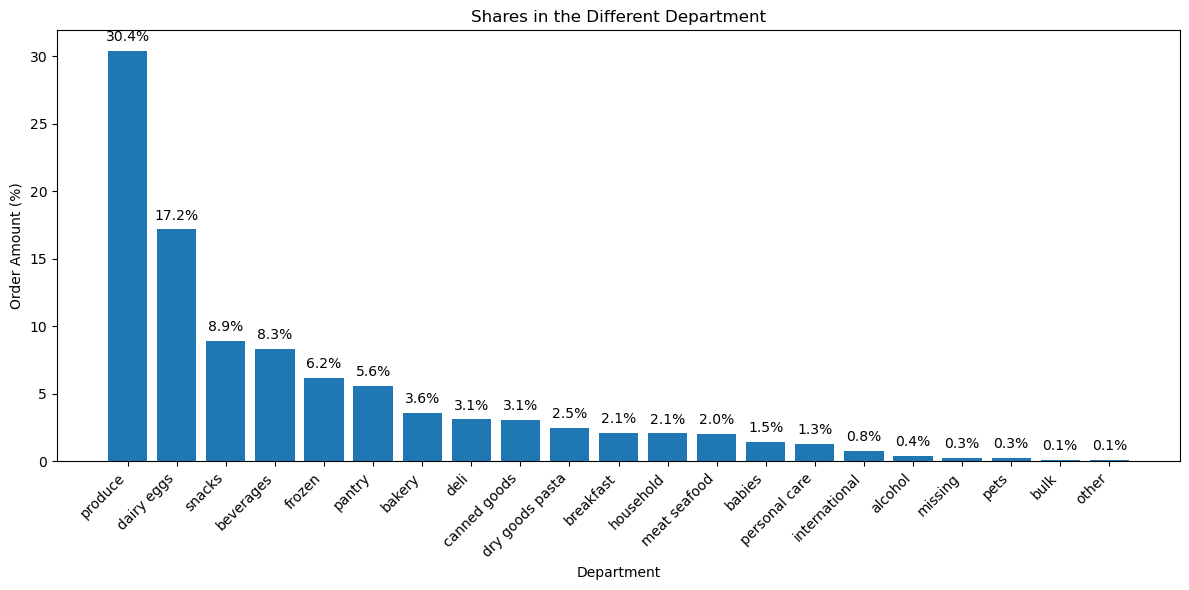

In [313]:
# Sort the DataFrame by 'order_amount_percentage' in descending order
department_order_amount_sorted = department_order_amount.sort_values(by='order_amount_percentage', ascending=False)

# Creation of the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(department_order_amount_sorted['department_name'], department_order_amount_sorted['order_amount_percentage'], color='#1F77B4')
plt.title('Shares in the Different Department')
plt.xlabel('Department')
plt.ylabel('Order Amount (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

#Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' new_department_share_age_group'), bbox_inches = 'tight')
plt.show()

#### c. Department share by Age Group 

In [131]:
# Group by age_group and department_name, calculate department shares
grouped_data = ords_prods_cust_active.groupby(['age_group', 'department_name'])['order_amount'].sum().reset_index()
grouped_data['department_share'] = grouped_data.groupby('age_group')['order_amount'].transform(lambda x: x / x.sum() * 100)

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\1047766451.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='department_name', y='department_share', hue='age_group', data=grouped_data_sorted, palette=colors)


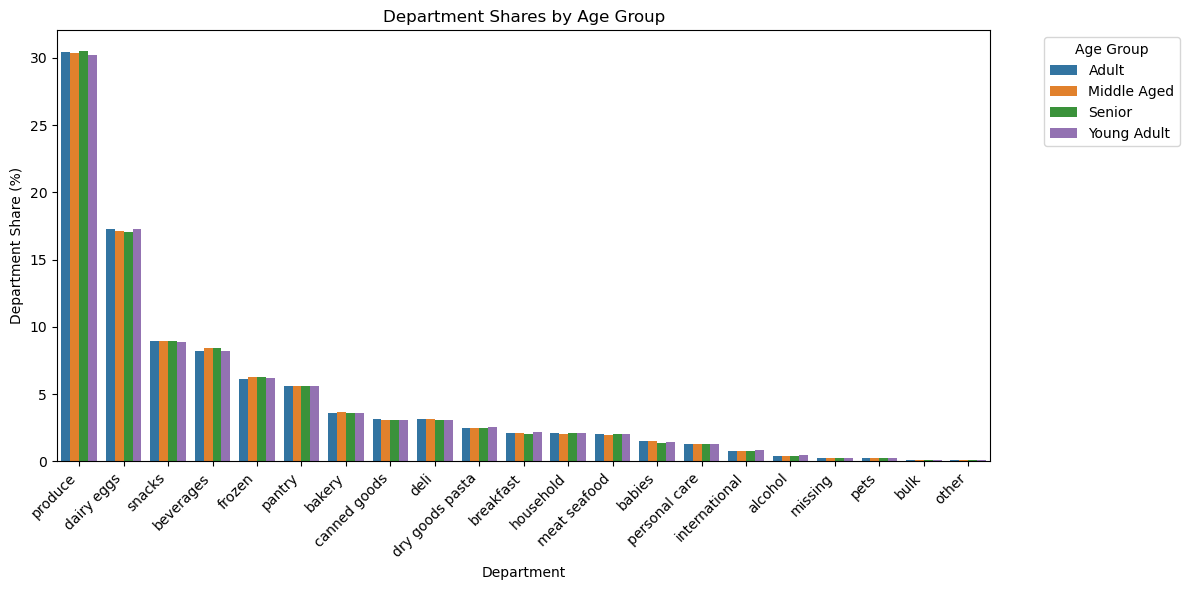

In [315]:
# Sort the data by 'department_share' within each 'age_group' in descending order
grouped_data_sorted = grouped_data.sort_values(by=['age_group', 'department_share'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='department_name', y='department_share', hue='age_group', data=grouped_data_sorted, palette=colors)
plt.title('Department Shares by Age Group')
plt.xlabel('Department')
plt.ylabel('Department Share (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot (adjust the path as per your setup)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_department_share_age_group'), bbox_inches='tight')

plt.show()

#### d. Department share by Income Category 

In [134]:
# Group by income_cat and department_name, calculate department shares
grouped_data_income = ords_prods_cust_active.groupby(['income_cat', 'department_name'])['order_amount'].sum().reset_index()
grouped_data_income['department_share'] = grouped_data_income.groupby('income_cat')['order_amount'].transform(lambda x: x / x.sum() * 100)

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3485513937.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='department_name', y='department_share', hue='income_cat', data=grouped_data_income_sorted, palette=colors)


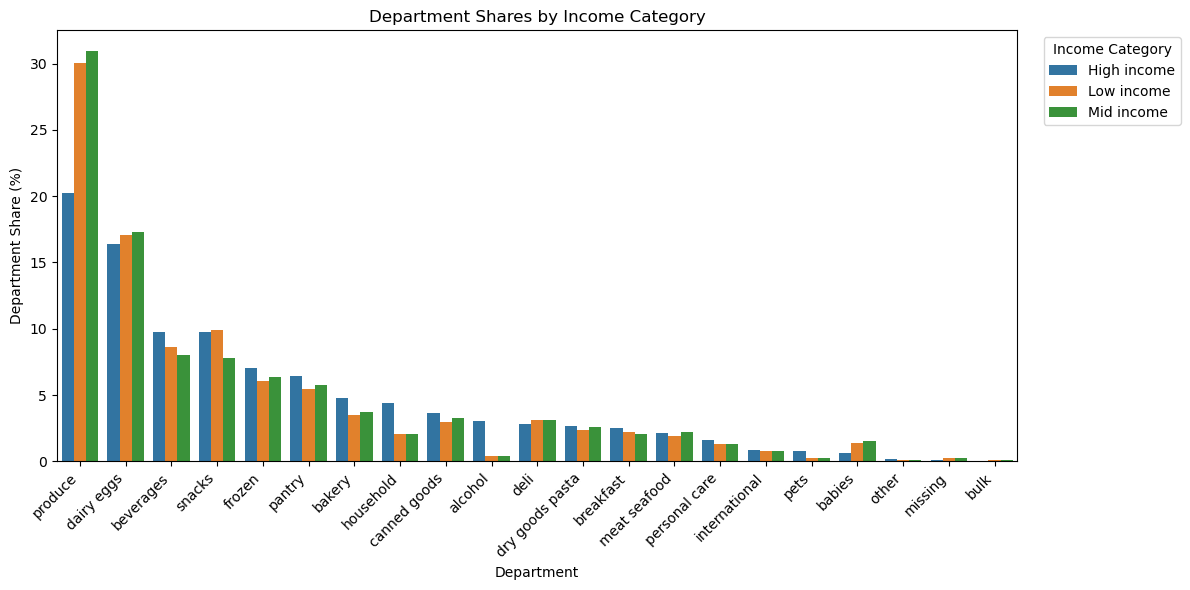

In [319]:
# Sort the data by 'department_share' within each 'income_cat' in descending order
grouped_data_income_sorted = grouped_data_income.sort_values(by=['income_cat', 'department_share'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='department_name', y='department_share', hue='income_cat', data=grouped_data_income_sorted, palette=colors)
plt.title('Department Shares by Income Category')
plt.xlabel('Department')
plt.ylabel('Department Share (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save the plot (adjust the path as per your setup)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_department_share_income_cat'), bbox_inches='tight')

plt.show()

#### e. Department share by Family Status 

In [137]:
# Group by family status and department_name, calculate department shares
grouped_data_fam = ords_prods_cust_active.groupby(['fam_status', 'department_name'])['order_amount'].sum().reset_index()
grouped_data_fam['department_share'] = grouped_data_fam.groupby('fam_status')['order_amount'].transform(lambda x: x / x.sum() * 100)

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\983743270.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='department_name', y='department_share', hue='fam_status', data=grouped_data_fam_sorted, palette=colors)


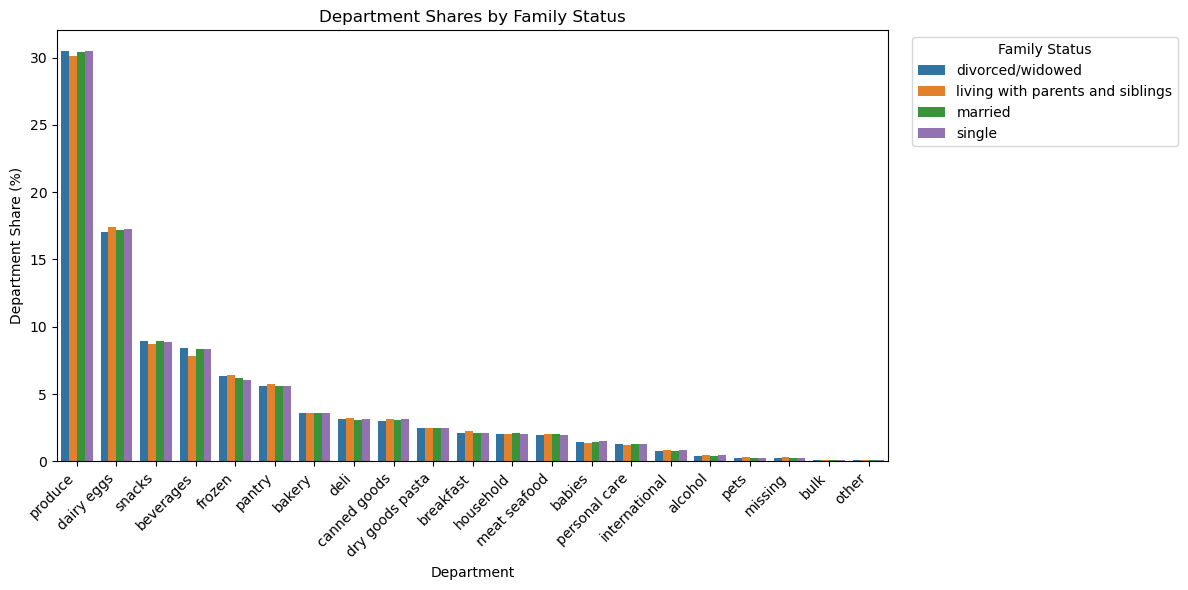

In [321]:
# Sort the data by 'department_share' within each 'fam_status' in descending order
grouped_data_fam_sorted = grouped_data_fam.sort_values(by=['fam_status', 'department_share'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='department_name', y='department_share', hue='fam_status', data=grouped_data_fam_sorted, palette=colors)
plt.title('Department Shares by Family Status')
plt.xlabel('Department')
plt.ylabel('Department Share (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Family Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save the plot (adjust the path as per your setup)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_department_share_fam_status'), bbox_inches='tight')

plt.show()

#### f. Department shares by Region

In [140]:
# Group by region and department_name, calculate department shares
grouped_data_region = ords_prods_cust_active.groupby(['region', 'department_name'])['order_amount'].sum().reset_index()
grouped_data_region['department_share'] = grouped_data_region.groupby('region')['order_amount'].transform(lambda x: x / x.sum() * 100)

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\2529956339.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='department_name', y='department_share', hue='region', data=grouped_data_region_sorted, palette=colors)


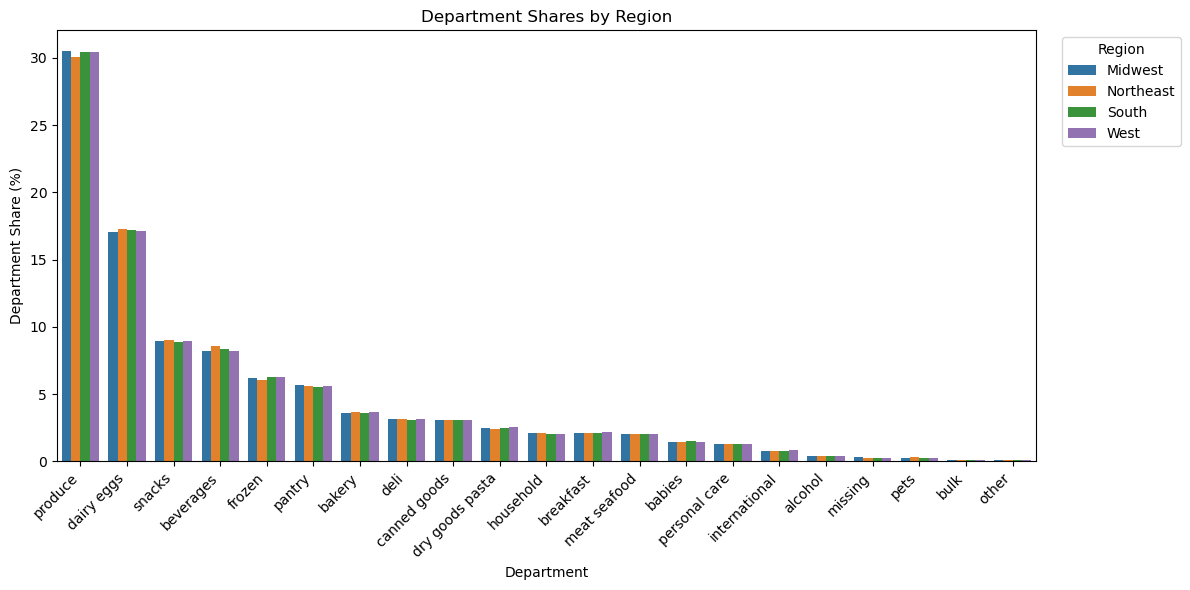

In [323]:
# Sort the data by 'department_share' within each 'region' in descending order
grouped_data_region_sorted = grouped_data_region.sort_values(by=['region', 'department_share'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='department_name', y='department_share', hue='region', data=grouped_data_region_sorted, palette=colors)
plt.title('Department Shares by Region')
plt.xlabel('Department')
plt.ylabel('Department Share (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save the plot (adjust the path as per your setup)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_department_share_region'), bbox_inches='tight')

plt.show()

#### g. Department shares by Dependents 

In [143]:
# Group by dependent and department_name, calculate department shares
grouped_data_dependant = ords_prods_cust_active.groupby(['dependant_flag', 'department_name'])['order_amount'].sum().reset_index()
grouped_data_dependant['department_share'] = grouped_data_dependant.groupby('dependant_flag')['order_amount'].transform(lambda x: x / x.sum() * 100)

C:\Users\salmi\AppData\Local\Temp\ipykernel_13684\3921955533.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='department_name', y='department_share', hue='dependant_flag', data=grouped_data_dependant_sorted, palette=colors)


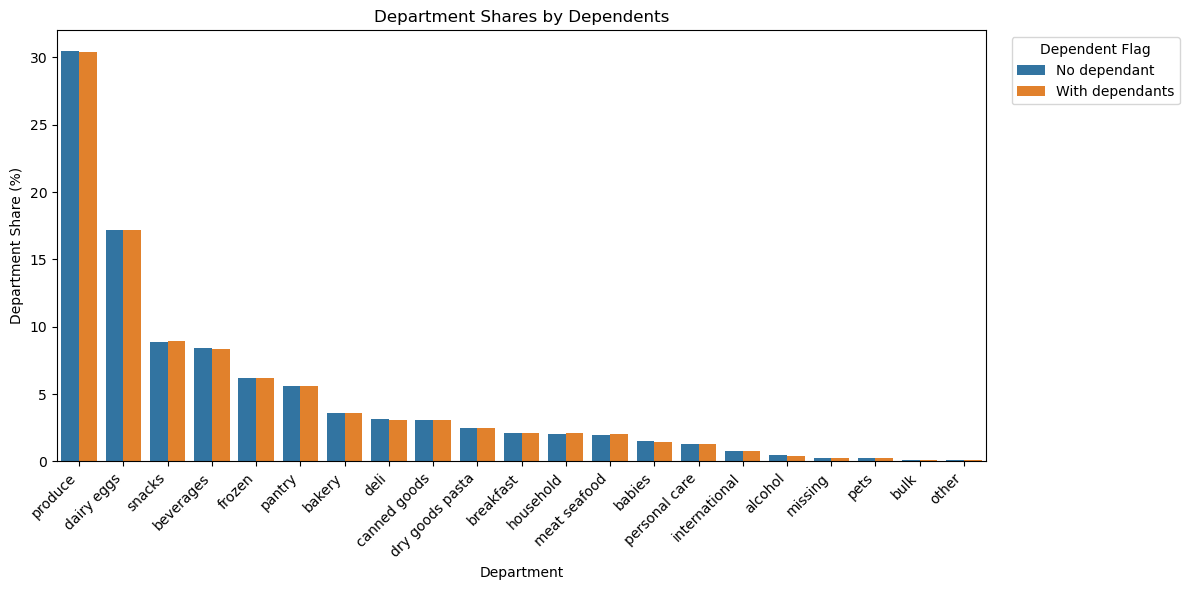

In [325]:
# Sort the data by 'department_share' within each 'dependant_flag' in descending order
grouped_data_dependant_sorted = grouped_data_dependant.sort_values(by=['dependant_flag', 'department_share'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='department_name', y='department_share', hue='dependant_flag', data=grouped_data_dependant_sorted, palette=colors)
plt.title('Department Shares by Dependents')
plt.xlabel('Department')
plt.ylabel('Department Share (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dependent Flag', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_department_share_dependant'), bbox_inches='tight')

plt.show()

## 9. Creation of other charts 

#### a. Family status per region

<Figure size 1000x800 with 0 Axes>

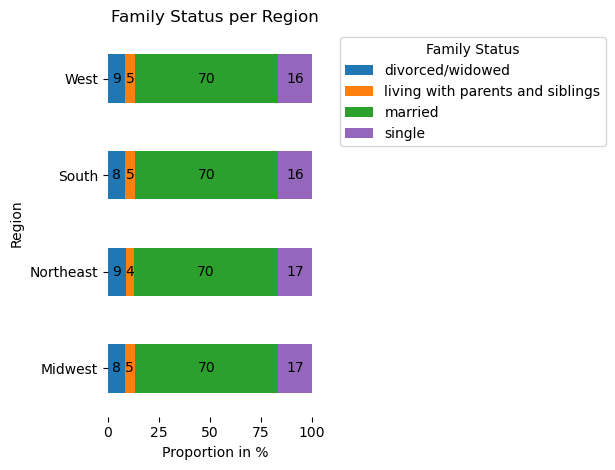

In [147]:
# Creation of a chart showing family status based on the region

fam_region_percent = pd.crosstab(sample_pop['region'], sample_pop['fam_status'], normalize='index') * 100

plt.figure(figsize=(10, 8))
bars1 = fam_region_percent.plot(kind='barh', color=colors, stacked=True)

plt.title('Family Status per Region')
plt.xlabel('Proportion in %')
plt.ylabel('Region')

# Annotate each bar with its percentage value (without decimals)
for spine in bars1.spines.values():
    spine.set_visible(False)

for bar in bars1.containers:
    plt.bar_label(bar, fmt='%.0f', label_type='center')

plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_stat_per_region.png'), bbox_inches='tight')
plt.show()

#### b. Income Category per Region

<Figure size 1400x1200 with 0 Axes>

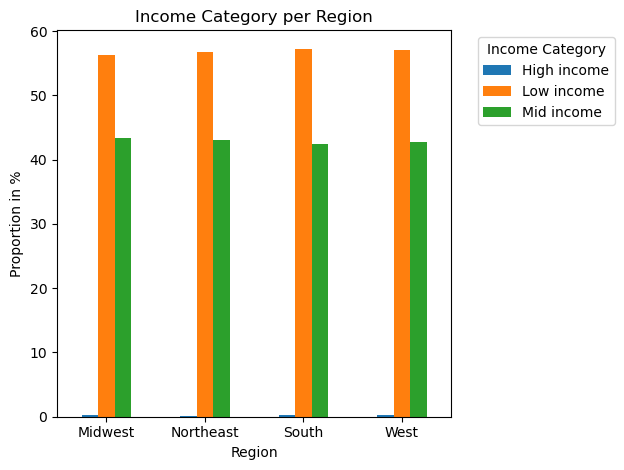

In [149]:
# Creation of a chart showing income category based on the region

income_region_percent = pd.crosstab(sample_pop['region'], sample_pop['income_cat'], normalize='index') * 100

plt.figure(figsize=(14, 12))
income_region_percent.plot(kind='bar', color=colors)
plt.title('Income Category per Region')
plt.xlabel('Region')
plt.ylabel('Proportion in %')
plt.xticks(rotation=0)
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_per_region.png'), bbox_inches = 'tight')
plt.show()

#### c. Share of Dependants per Region

<Figure size 1400x1200 with 0 Axes>

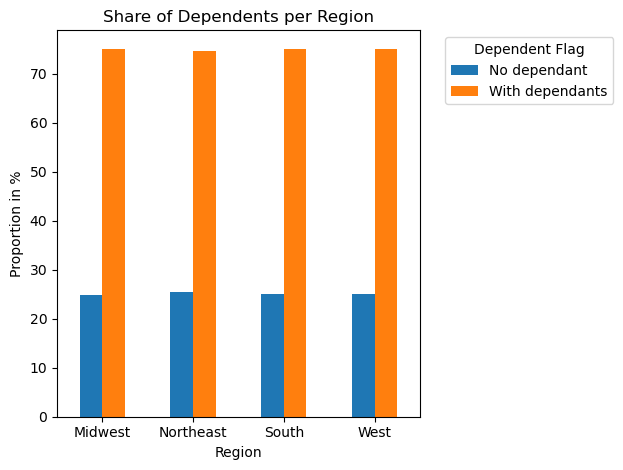

In [151]:
# Creation of a chart showing dependants based on the region

dependant_region_percent = pd.crosstab(sample_pop['region'], sample_pop['dependant_flag'], normalize='index') * 100

plt.figure(figsize=(14, 12))
dependant_region_percent.plot(kind='bar', color=colors)
plt.title('Share of Dependents per Region')
plt.xlabel('Region')
plt.ylabel('Proportion in %')
plt.xticks(rotation=0)
plt.legend(title='Dependent Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_per_region.png'), bbox_inches = 'tight')
plt.show()

### 10. Exporting dataset

In [153]:
ords_prods_cust_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_only_active_2.pkl'))